In [7]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from src.wmfact import WeightedMatrixFactorization

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Data loading and preprocessing
In this section, we load the rating and movie data from CSV files and preprocess it to create the feedback matrix.

In [8]:
# Read data
ratings = pd.read_csv('data/ratings.csv')
movies = pd.read_csv('data/movies.csv')

print("Ratings", ratings.shape)
print("Movies", movies.shape)

Ratings (100000, 3)
Movies (1682, 2)


The ratings dataset includes three columns (user_id, movie_id, rating). Each row represents a single rating given by a user to a particular movie.
The movies dataset, instead, contains information about the movies themselves (movie_id, title). Each row represents a single movie in the dataset.

### Creating the Feedback Matrix
In this section, we create a feedback matrix from the ratings data. The feedback matrix represents the ratings given by users for different movies.

In [9]:
feedbacks = ratings.pivot_table(values='rating', index=['user_id'], columns=['movie_id']).values
display(feedbacks)
print("feedbacks matrix shape: ", feedbacks.shape)

# save the feedbacks matrix
np.save('data/feedbacks.npy', feedbacks)

array([[ 5.,  3.,  4., ..., nan, nan, nan],
       [ 4., nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [ 5., nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan,  5., nan, ..., nan, nan, nan]])

feedbacks matrix shape:  (943, 1682)


## Weighted Matrix Factorization model

The Weighted Matrix Factorization model aims to factorize the sparse feedback matrix into low-rank user and item matrices, capturing underlying patterns in the data to predict missing ratings. In this implementation, we utilize the Weighted Alternating Least Squares (WALS) algorithm, which iteratively updates user and item embeddings to minimize the reconstruction error of observed ratings, while applying regularization to prevent overfitting.

- **n_iter**: The number of iterations for model fitting. Higher values may lead to better convergence but also increase computational cost.
- **n_latents**: The number of latent factors. A higher number allows the model to capture more complex patterns but may also increase the risk of overfitting.
- **lambda_reg**: The regularization parameter λ. It controls the extent of regularization applied to the model. Higher values of λ lead to stronger regularization.


In [10]:
# define the model
model = WeightedMatrixFactorization(feedbacks)

### Param grid for tuning the hyperparameters
In this section, we'll engage in hyperparameter tuning to identify the model that minimizes the loss function. It's important to note that the optimal approach for hyperparameter tuning involves partitioning the feedback matrix into training and test sets, and evaluating a chosen metric on the test set after each tuning iteration.

In [11]:
param_grid = {
    'n_iter': [9, 13, 17],
    'n_latents': [100, 150, 250],
    'lambda_reg': [0.01, 0.02]
}

best_params, best_hist = model.grid_search(param_grid, seed=42)

print("Best params: ", best_params)
print("Best hist: ", best_hist)

* Fitting the model with wals method: n_iter = 9, n_latents = 100, lambda_reg = 0.01 *


100%|██████████| 9/9 [14:39<00:00, 97.68s/it, loss=3859.20]    



-> Model saved to models/wmf_wals_nlat100_niter9_lambdareg0.01_20240208154923.pkl
-> History saved to models/wmf_wals_nlat100_niter9_lambdareg0.01_20240208154923.csv

* Fitting the model with wals method: n_iter = 9, n_latents = 100, lambda_reg = 0.02 *


100%|██████████| 9/9 [13:17<00:00, 88.63s/it, loss=6183.91]  



-> Model saved to models/wmf_wals_nlat100_niter9_lambdareg0.02_20240208160241.pkl
-> History saved to models/wmf_wals_nlat100_niter9_lambdareg0.02_20240208160241.csv

* Fitting the model with wals method: n_iter = 13, n_latents = 100, lambda_reg = 0.01 *


100%|██████████| 13/13 [20:08<00:00, 92.96s/it, loss=3478.52]



-> Model saved to models/wmf_wals_nlat100_niter13_lambdareg0.01_20240208162249.pkl
-> History saved to models/wmf_wals_nlat100_niter13_lambdareg0.01_20240208162249.csv

* Fitting the model with wals method: n_iter = 13, n_latents = 100, lambda_reg = 0.02 *


100%|██████████| 13/13 [13:20<00:00, 61.57s/it, loss=5822.93]



-> Model saved to models/wmf_wals_nlat100_niter13_lambdareg0.02_20240208163610.pkl
-> History saved to models/wmf_wals_nlat100_niter13_lambdareg0.02_20240208163610.csv

* Fitting the model with wals method: n_iter = 17, n_latents = 100, lambda_reg = 0.01 *


100%|██████████| 17/17 [16:16<00:00, 57.41s/it, loss=3307.91]



-> Model saved to models/wmf_wals_nlat100_niter17_lambdareg0.01_20240208165226.pkl
-> History saved to models/wmf_wals_nlat100_niter17_lambdareg0.01_20240208165226.csv

* Fitting the model with wals method: n_iter = 17, n_latents = 100, lambda_reg = 0.02 *


100%|██████████| 17/17 [16:30<00:00, 58.24s/it, loss=5682.70]



-> Model saved to models/wmf_wals_nlat100_niter17_lambdareg0.02_20240208170856.pkl
-> History saved to models/wmf_wals_nlat100_niter17_lambdareg0.02_20240208170856.csv

* Fitting the model with wals method: n_iter = 9, n_latents = 150, lambda_reg = 0.01 *


100%|██████████| 9/9 [12:18<00:00, 82.03s/it, loss=1542.34] 



-> Model saved to models/wmf_wals_nlat150_niter9_lambdareg0.01_20240208172114.pkl
-> History saved to models/wmf_wals_nlat150_niter9_lambdareg0.01_20240208172114.csv

* Fitting the model with wals method: n_iter = 9, n_latents = 150, lambda_reg = 0.02 *


100%|██████████| 9/9 [12:15<00:00, 81.72s/it, loss=3759.84] 



-> Model saved to models/wmf_wals_nlat150_niter9_lambdareg0.02_20240208173330.pkl
-> History saved to models/wmf_wals_nlat150_niter9_lambdareg0.02_20240208173330.csv

* Fitting the model with wals method: n_iter = 13, n_latents = 150, lambda_reg = 0.01 *


100%|██████████| 13/13 [17:13<00:00, 79.50s/it, loss=1427.64]



-> Model saved to models/wmf_wals_nlat150_niter13_lambdareg0.01_20240208175043.pkl
-> History saved to models/wmf_wals_nlat150_niter13_lambdareg0.01_20240208175043.csv

* Fitting the model with wals method: n_iter = 13, n_latents = 150, lambda_reg = 0.02 *


100%|██████████| 13/13 [16:17:03<00:00, 4509.46s/it, loss=3641.05]     



-> Model saved to models/wmf_wals_nlat150_niter13_lambdareg0.02_20240209100746.pkl
-> History saved to models/wmf_wals_nlat150_niter13_lambdareg0.02_20240209100746.csv

* Fitting the model with wals method: n_iter = 17, n_latents = 150, lambda_reg = 0.01 *


100%|██████████| 17/17 [21:30<00:00, 75.93s/it, loss=1385.02]



-> Model saved to models/wmf_wals_nlat150_niter17_lambdareg0.01_20240209102917.pkl
-> History saved to models/wmf_wals_nlat150_niter17_lambdareg0.01_20240209102917.csv

* Fitting the model with wals method: n_iter = 17, n_latents = 150, lambda_reg = 0.02 *


100%|██████████| 17/17 [23:32<00:00, 83.08s/it, loss=3590.64]



-> Model saved to models/wmf_wals_nlat150_niter17_lambdareg0.02_20240209105249.pkl
-> History saved to models/wmf_wals_nlat150_niter17_lambdareg0.02_20240209105249.csv

* Fitting the model with wals method: n_iter = 9, n_latents = 250, lambda_reg = 0.01 *


100%|██████████| 9/9 [5:51:35<00:00, 2343.96s/it, loss=1889.34]    



-> Model saved to models/wmf_wals_nlat250_niter9_lambdareg0.01_20240209164425.pkl
-> History saved to models/wmf_wals_nlat250_niter9_lambdareg0.01_20240209164425.csv

* Fitting the model with wals method: n_iter = 9, n_latents = 250, lambda_reg = 0.02 *


100%|██████████| 9/9 [24:02<00:00, 160.30s/it, loss=3047.21]    



-> Model saved to models/wmf_wals_nlat250_niter9_lambdareg0.02_20240209170828.pkl
-> History saved to models/wmf_wals_nlat250_niter9_lambdareg0.02_20240209170828.csv

* Fitting the model with wals method: n_iter = 13, n_latents = 250, lambda_reg = 0.01 *


100%|██████████| 13/13 [30:32<00:00, 140.98s/it, loss=830.81] 



-> Model saved to models/wmf_wals_nlat250_niter13_lambdareg0.01_20240209173901.pkl
-> History saved to models/wmf_wals_nlat250_niter13_lambdareg0.01_20240209173901.csv

* Fitting the model with wals method: n_iter = 13, n_latents = 250, lambda_reg = 0.02 *


100%|██████████| 13/13 [38:55<00:00, 179.68s/it, loss=3047.36]



-> Model saved to models/wmf_wals_nlat250_niter13_lambdareg0.02_20240209181757.pkl
-> History saved to models/wmf_wals_nlat250_niter13_lambdareg0.02_20240209181757.csv

* Fitting the model with wals method: n_iter = 17, n_latents = 250, lambda_reg = 0.01 *


100%|██████████| 17/17 [47:39<00:00, 168.18s/it, loss=829.75] 



-> Model saved to models/wmf_wals_nlat250_niter17_lambdareg0.01_20240209190536.pkl
-> History saved to models/wmf_wals_nlat250_niter17_lambdareg0.01_20240209190536.csv

* Fitting the model with wals method: n_iter = 17, n_latents = 250, lambda_reg = 0.02 *


 35%|███▌      | 6/17 [13:19<24:34, 134.08s/it, loss=3086.81] 

In [ ]:
# load the best model
model = WeightedMatrixFactorization.load('data/best_model.pkl')

### Model evaluation

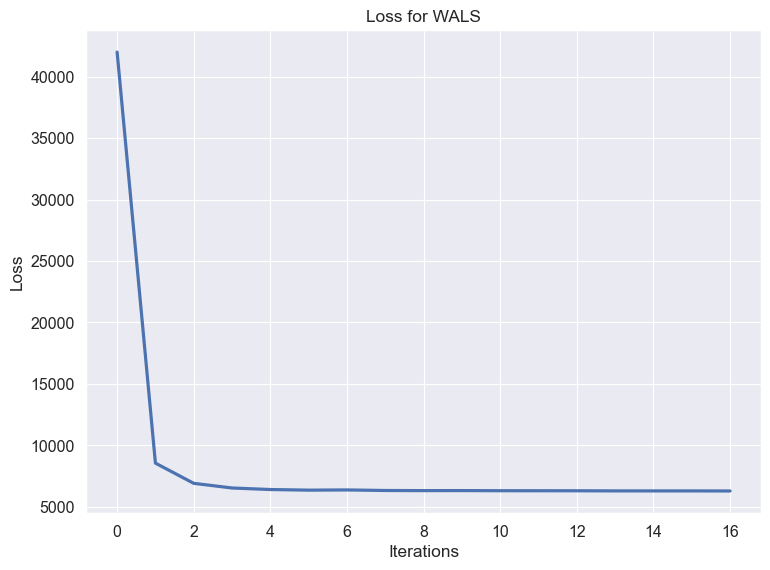

In [48]:
# plot loss from history:
sns.set(rc={'figure.figsize':(8.7,6.27)})
sns.set_context('paper', font_scale=1.3, rc={"lines.linewidth": 2.3})
lists = sorted(history.items())
x, y = zip(*lists)
sns.lineplot(
  x=list(history.keys()), 
  y=list(history.values())
)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss for WALS")
plt.show()

In [58]:
preds = model.predict_all()

user_id = 13
movie_id = 17

print("Real rating: ", feedbacks[user_id, movie_id])
print("Predicted rating: ", preds[user_id, movie_id])

Real rating:  3.0
Predicted rating:  2.9112247611069817
